In [1]:
import pickle

from keyrover import *
from keyrover.homography import *

In [2]:
SIZE = (256, 256)

device = get_device()

with open("blender/camera_data.bin", "rb") as f:
    camera_data = pickle.load(f)

(480.0, 0.0)

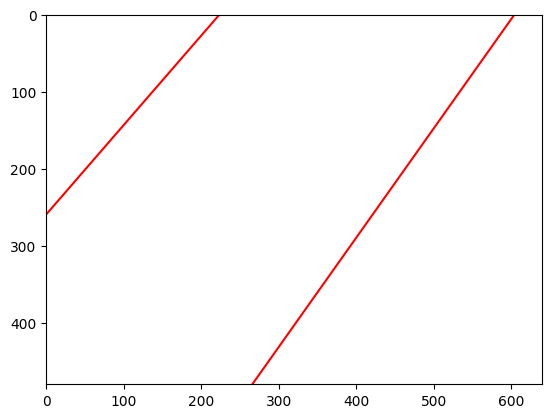

In [34]:
i = 102

location = camera_data["location"][i]
rotation = camera_data["rotation"][i]

camera = torch.tensor([[*rotation, *location]], device=device, dtype=torch.float32)
corners = prediction_to_corners(camera)
    
a, b, c, d = map(lambda t: t.cpu(), corners)
plt.scatter(*a)
plt.scatter(*b)
plt.scatter(*c)
plt.scatter(*d)

quad = np.array([a, b, c, d, a]).T[0]
plt.plot(*quad, 'r-')
plt.xlim(0, 640)
plt.ylim(480, 0)

In [54]:
locations = np.array(camera_data["location"])
rotations = np.array(camera_data["rotation"])

camera_locations = np.hstack([rotations, locations])
camera_locations = torch.tensor(camera_locations, device=device, dtype=torch.float32)

corners = prediction_to_corners(camera_locations)
print(corners)
corners = np.array(tuple(map(lambda t: t.cpu().numpy(), corners)))
corners = np.vstack(corners).T

mean = corners.mean(axis=0, keepdims=True)
std = corners.std(axis=0, keepdims=True)

corners = (corners - mean) / std
corners

(tensor([[ 525.5950, -129.8298,  486.0759,  ...,  -53.2168,  724.1497,  283.0581],
        [ 610.0858,  123.7322,  579.4208,  ...,   -3.5823,  -87.3457,  632.5768]], device='mps:0'), tensor([[ 278.3471,  361.0503,  332.8941,  ...,  581.1555,  150.6584,  484.5013],
        [ -26.9529,  353.0044, -219.8937,  ...,  728.2862,  258.4885,   30.4871]], device='mps:0'), tensor([[  94.0053,  429.4090,   98.2367,  ...,  810.3675,  259.4764,  315.1675],
        [  53.2162,  164.9558, -189.9342,  ...,  434.9232,  492.3589,   -9.2654]], device='mps:0'), tensor([[ 309.1149,  -41.8203,  185.5001,  ...,  154.2661,  846.4612,   73.9231],
        [ 714.3154,  -42.9593,  642.1172,  ..., -199.5493,  124.0093,  538.1232]], device='mps:0'))


array([[      1.367,        0.95,    -0.83622, ...,    -0.39182,     0.58357,      1.7256],
       [   -0.85144,    -0.56039,    -0.55227, ...,   -0.053134,    -0.59311,    -0.65782],
       [     1.2332,     0.85477,    -0.64894, ...,     -1.1288,     0.16909,      1.4984],
       ...,
       [   -0.59213,    -0.95576,     0.20343, ...,     0.76515,    0.064365,     -1.1507],
       [      2.039,     -1.2159,     -1.2746, ...,     0.93924,      2.3853,    -0.13231],
       [    0.54605,      1.0198,    -0.12842, ...,    -0.58121,    -0.20502,       1.171]], dtype=float32)

In [55]:
mean, std

(array([[     121.73,      304.18,      521.91,      321.19,      518.25,      182.49,      135.07,      166.05]], dtype=float32),
 array([[     295.45,      322.01,      291.26,      333.85,      291.21,      329.92,      298.24,      317.73]], dtype=float32))

In [56]:
with open("datasets/corners/corners.pkl", "wb") as f:
    pickle.dump(corners, f)